# General information

The following Jupyter notebook was created in order to derive some meaningful insights from the US Permanent Visa Application decisions. Data covers years 2012 - 2017 and includes information on employer, position, wage offered, job posting history, employee education and past visa history, associated lawyers, and final decision. It was collected and distributed by the US Department of Labor.

According to Kaggle's dataset context, a permanent labor certification issued by the Department of Labor (DOL) allows an employer to hire a foreign worker to work permanently in the United States. In most instances, before the U.S. employer can submit an immigration petition to the Department of Homeland Security's U.S. Citizenship and Immigration Services (USCIS), the employer must obtain a certified labor certification application from the DOL's Employment and Training Administration (ETA). The DOL must certify to the USCIS that there are not sufficient U.S. workers able, willing, qualified and available to accept the job opportunity in the area of intended employment and that employment of the foreign worker will not adversely affect the wages and working conditions of similarly employed U.S. workers.

The goal of the below data analysis is checking the general trend in Visa applications, the most popular citizenships, employers, cities and finally, predicting the application decision based on the chosen features.

# Importing necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the directory.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploration of the dataset

Reading the raw data from the "us_perm_visas.csv" file available within Kaggle's datasets into a dataframe

In [ ]:
# Decision_date and case_recieved_date are read as dates
df = pd.read_csv('/content/drive/My Drive/LLM_Data/us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'])

Let's take a look at the structure of our dataset by checking the number of observations, columns and displaying 10 first and last rows.

In [ ]:
# Displaying number of rows and columns
print('Number of Visa Applications:', len(df))
print('Number of Columns:', len(df.columns))

Number of Visa Applications: 374362
Number of Columns: 154


In [ ]:
#assume the original cases are not fraudulent for base dataset
#append GAN data to original dataframe, add column for fraud
#is_fraud

#pass_fail -- if fraudulent fail immediately
#approved - don't make recommendation
#declined - make recommendation
#funnelling data we're getting from end users
#i.e., approved throw it out for recommendations
#declined, keep funnelling and then make recommendation
#ML pipeline
#keep it as modular as possible
#draw the line between all the data points
#underfit - not very performative on the training data compared to the test data
#two different models - leave the knn model - another model fraudulent/not fraudulent

In [ ]:
# Displaying 5 first rows
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [ ]:
# Displaying 5 last rows
df.tail()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN
374361,NaN,Phoenix,"Fragomen, Del Rey, Bernsen & Loewy, LLP",AZ,NaN,NaN,A-16279-59292,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"84,926.00","121,500.00",Year,NaN,NaN,NaN


As we can see, our data set consists of 374362 applications described by 153 attributes. Let's display their names.

In [ ]:
print(df.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

Since we have 2 attributes that may contain similar information - case_number & case_no - let's check their lenghts, number of missing values and example values.

In [ ]:
print("Length of 'case_number' column is: ", len(df['case_number'])," with",df.case_number.isnull().sum(), "missing values")
print("Length of 'case_no' column is: ", len(df['case_no'])," with", df.case_no.isnull().sum(),"missing values \n")

print("First 2 values of case_number column are : \n", df['case_number'].head(2),"\n")

print("Last 2 values of case_number column are : \n", df['case_number'].tail(2), "\n")
print("First 2 values of case_no column are : \n", df['case_no'].head(2), "\n")
print("Last 2 values of case_no column are : \n", df['case_no'].tail(2))

Length of 'case_number' column is:  374362  with 135269 missing values
Length of 'case_no' column is:  374362  with 239093 missing values 

First 2 values of case_number column are : 
 0    NaN
1    NaN
Name: case_number, dtype: object 

Last 2 values of case_number column are : 
 374360    A-16357-84250
374361    A-16279-59292
Name: case_number, dtype: object 

First 2 values of case_no column are : 
 0    A-07323-97014
1    A-07332-99439
Name: case_no, dtype: object 

Last 2 values of case_no column are : 
 374360    NaN
374361    NaN
Name: case_no, dtype: object


As we supposed, these columns contain similar values and their "NaN" values add up to the total number of observations so let's create new column containing only non missing values from both "case_number" and "case_no" columns and then we will remove them.

In [ ]:
casenoindex = df.columns.get_loc("case_no")
casenumberindex = df.columns.get_loc("case_number")
casenumberlist = []

for value in df.iloc[0:135269,casenoindex]:
    casenumberlist.append(value)

for value in df.iloc[135269:374363,casenumberindex]:
    casenumberlist.append(value)

df['casenumber'] = casenumberlist
df.drop(df.columns[[casenoindex,casenumberindex]], axis=1, inplace=True)

Now, let's check the "case_status" column as it may contain information about decision made for respective Visa application and print the length of unique values it contains.

In [ ]:
#Printing number of unique values for 'case_status' column
for value in df.case_status.unique():
    print(len(df[df['case_status'] == value])," occurrences of status '{}'".format(value))

181933  occurrences of status 'Certified'
25649  occurrences of status 'Denied'
148586  occurrences of status 'Certified-Expired'
18194  occurrences of status 'Withdrawn'





Since our observations contain some records with status == "Withdrawn", we will remove them from our dataset and for cases where status is "Certified" or "Certified-Expired" we will use just one value " Certified" so that we will end up having only the desired values namely "Certified" and "Denied".  According to Wikipedia and other internet resources, petitioners have 6 months time to file I-140 form after the receiving the status of "Certified" before it expires and turns to "Certified-Expired" status.

Form I-140, Immigrant Petition for Alien Worker is a form submitted to the United States Citizenship and Immigration Services (USCIS) by a prospective employer to petition an alien to work in the US on a permanent basis. This is done in the case when the worker is deemed extraordinary in some sense or when qualified workers do not exist in the US.

In [ ]:
#Removing all withdrawn applications
df = df[df.case_status != 'Withdrawn']

#Combining certified-expired and certified applications and displaying distribution of "case_status" variable
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df.case_status.value_counts()

,count
case_status,
Certified,330519
Denied,25649


It's interesting that only 7.2% of Visa applications were denied. Now, let's perform dimensionality reduction by removing rows and columns containing only 'NaN' values and check the dataframe's shape.

In [ ]:
#Dropping all empty columns
df = df.dropna(axis=1, how='all');

#Dropping all empty rows
df = df.dropna(axis=0, how='all');

df.shape

(356168, 153)

It looks like there are neither rows nor columns containing only 'NaN' values so let's check how many columns contains any missing values.

In [ ]:
# Displaying number of missing values in each column
for column in df.columns:
    print("Attribute '{}' contains ".format(column),  df[column].isnull().sum().sum(), " missing values")

Attribute 'add_these_pw_job_title_9089' contains  317031  missing values
Attribute 'agent_city' contains  153452  missing values
Attribute 'agent_firm_name' contains  157646  missing values
Attribute 'agent_state' contains  156544  missing values
Attribute 'application_type' contains  229320  missing values
Attribute 'case_received_date' contains  126848  missing values
Attribute 'case_status' contains  0  missing values
Attribute 'class_of_admission' contains  21085  missing values
Attribute 'country_of_citizenship' contains  19272  missing values
Attribute 'country_of_citzenship' contains  336951  missing values
Attribute 'decision_date' contains  0  missing values
Attribute 'employer_address_1' contains  37  missing values
Attribute 'employer_address_2' contains  236133  missing values
Attribute 'employer_city' contains  10  missing values
Attribute 'employer_country' contains  126920  missing values
Attribute 'employer_decl_info_title' contains  126886  missing values
Attribute 'em

## Visualization of the unprocessed data

Before removing columns which consist mostly of missing values, let's create a new column containing only the year of Visa application submission and perform some visualisation in order to derive initial insights .

[Text(0.5, 0, 'Visa application year'),
 Text(0, 0.5, 'Number of Visa applicatons')]

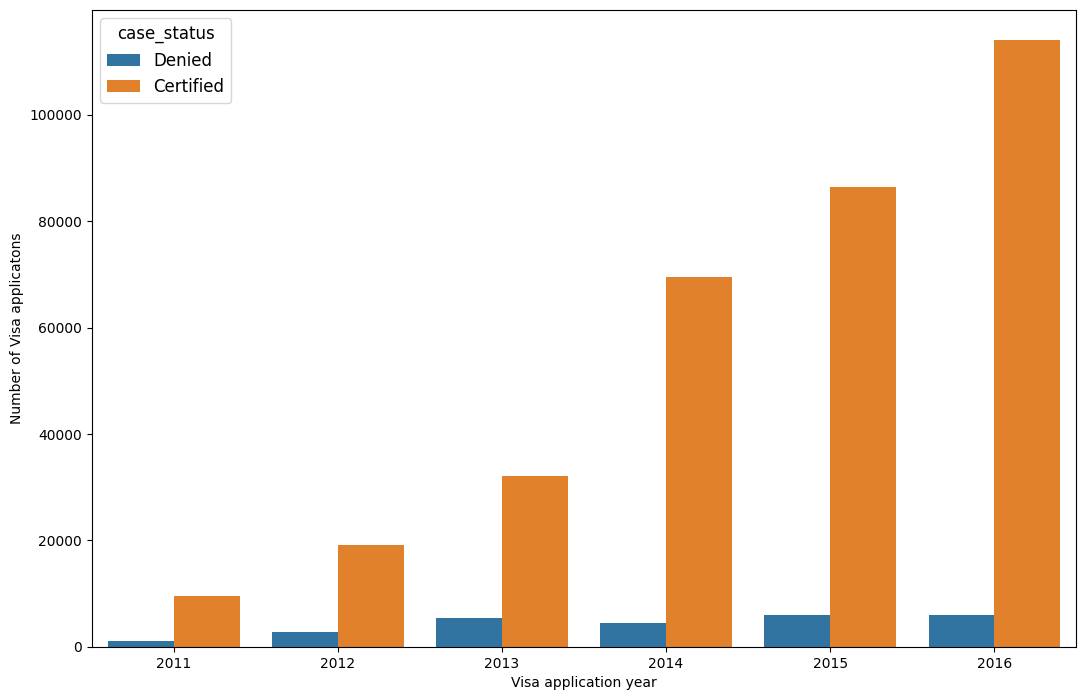

In [ ]:
#Converting the date to contain just the year of application submission
df['year'] = df['decision_date'].dt.year

#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12})
sns.countplot(x="year", hue="case_status", data=df)
ax.set(xlabel='Visa application year', ylabel='Number of Visa applicatons')


As we can observe, the number of submitted Visa applications increases every year. It's interesting that while the number of possitively considered applications increases, the number of "Denied" ones seems to be similar from year 2013. As a next step, let's see, what where the most popular cities.

In [ ]:
# Displaying 15 most popular cities
df['employer_city'] = df['employer_city'].str.upper()
df['employer_city'].value_counts().head(15)

,count
employer_city,
NEW YORK,17198
COLLEGE STATION,11985
SANTA CLARA,10519
SAN JOSE,9147
REDMOND,8485
MOUNTAIN VIEW,8121
HOUSTON,6720
SAN FRANCISCO,6352
SUNNYVALE,6104


[Text(0.5, 0, 'Employer city'), Text(0, 0.5, 'Number of Visa applications')]

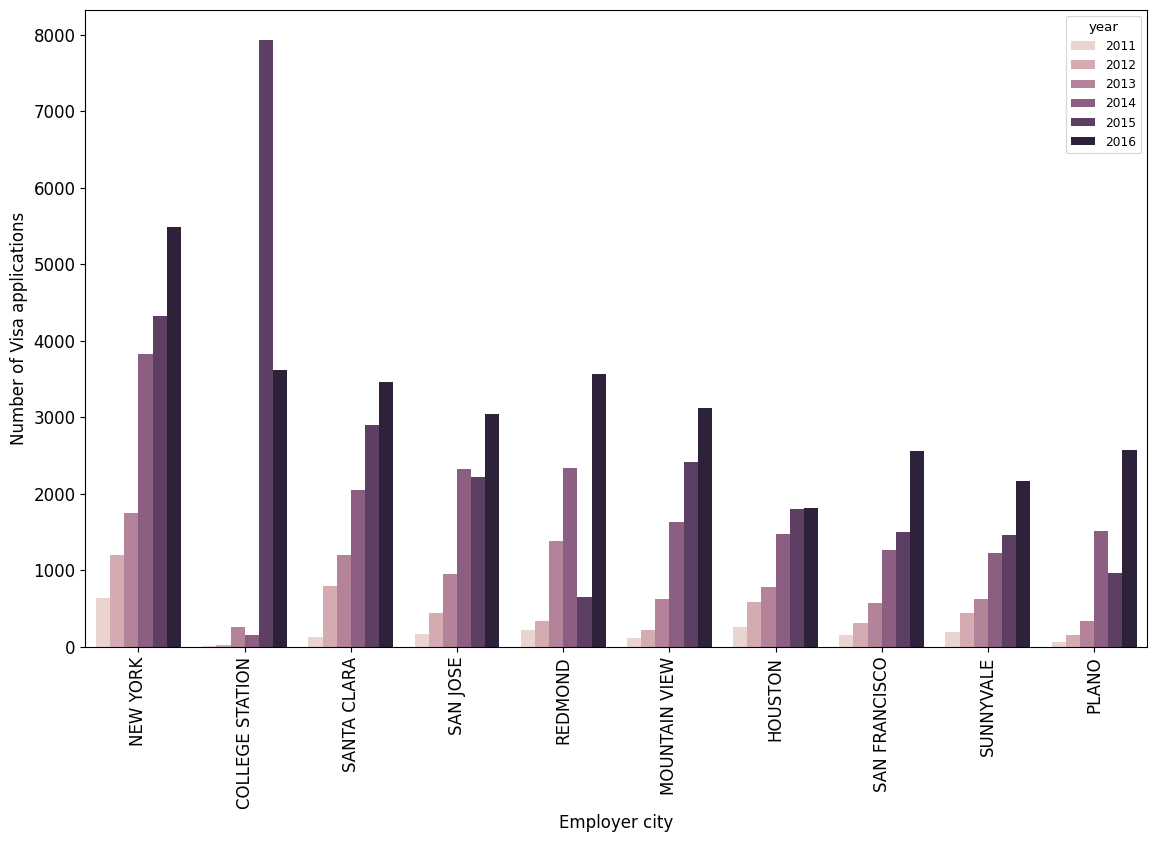

In [ ]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})
sns.countplot(x='employer_city', hue='year', data=df, order=df.employer_city.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
ax.set(xlabel='Employer city', ylabel='Number of Visa applications')

In the last few years, the most popular destination cities were: New York, College Station, Santa Clara, San Jose, Redmond, Mountain View, Houston, SunnyVale, San Francisco and Plano. In most of the cities there was a positive trend in Visa applications. A bizarre situation occured in College Station in 2015 where the number of submitted Visa applications was more or less twice large as in other cities.  


Now, let's take a look what were the most hiring employers and economic sectors through these years. For "us_economic_sector" variable we have only 120 868 non-missing values, but this should give us an insight.

<ipython-input-16-14e0f86aa79d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)
<ipython-input-16-14e0f86aa79d>:5: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)


[Text(0.5, 0, 'Employer name'), Text(0, 0.5, 'Number of Visa applications')]

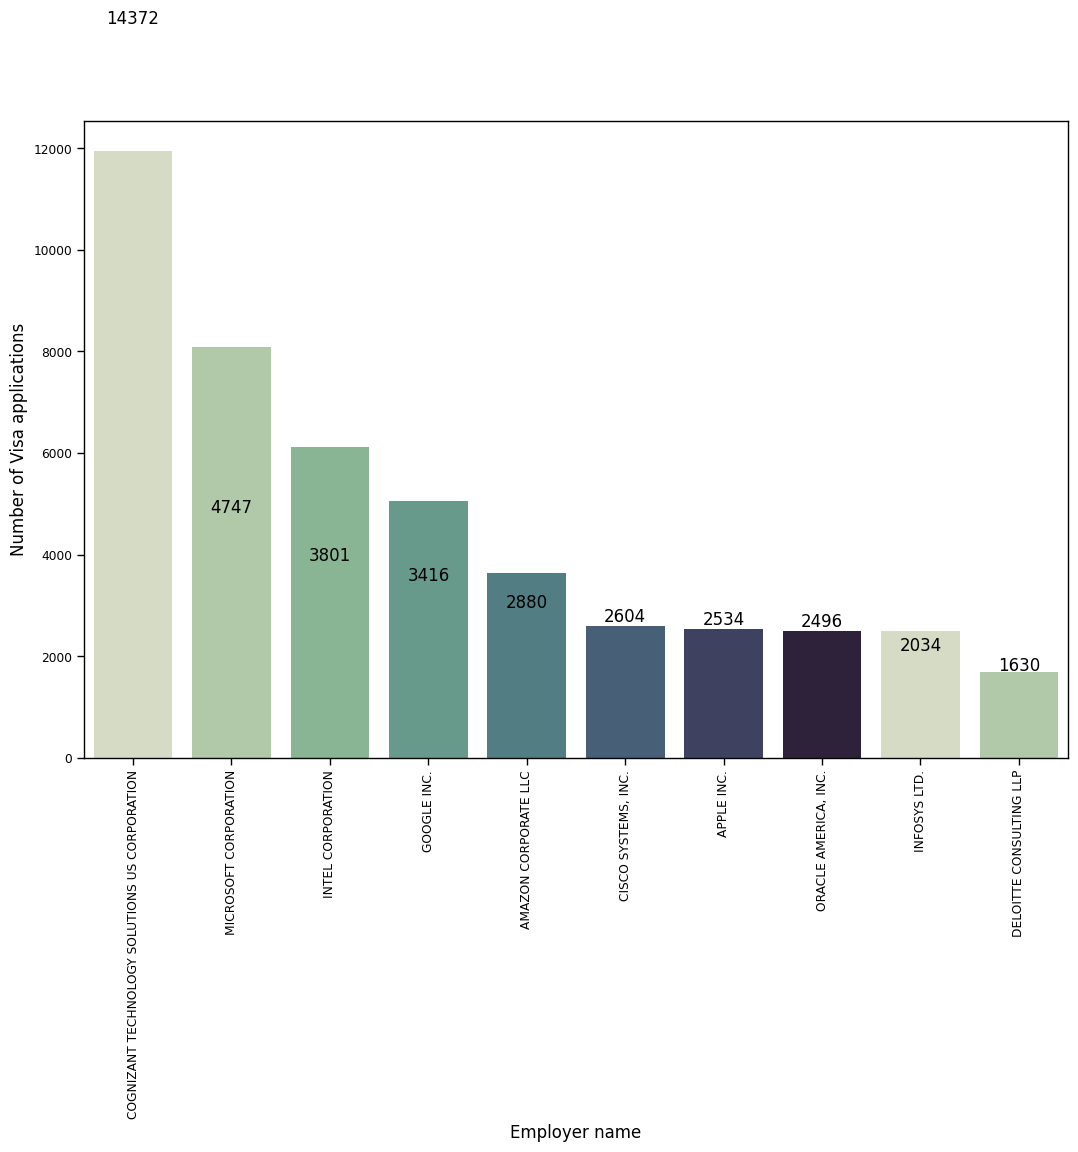

In [ ]:

#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":12,"axes.labelsize":13})
sns.countplot(x='employer_name', data=df, palette = sns.cubehelix_palette(8, start=.5, rot=-.75), order=df.employer_name.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Get value counts
value_counts = df.job_info_job_title.value_counts().iloc[:10]

#Iterating over elements in "job_info_job_title" column and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
        ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

ax.set(xlabel='Employer name', ylabel='Number of Visa applications')

As we can see, 9 out of 10 most beneficial companies for Visa applicants are IT industry representatives. This leads to the assumption that IT sector is both most favourable and demanding one in United States. Let's check what is the distribution of industries across all Visa applications.

In [ ]:
#Creating empty dictionary
us_economic_counts = {}

#Iterating over "us_economic_sector" column and appending values to the "us_economic_counts" dictionary
for value in df['us_economic_sector'].dropna():
    if value in us_economic_counts:
        us_economic_counts[value] += 1
    else:
        us_economic_counts[value] = 1

([<matplotlib.patches.Wedge at 0x7b2d82571a90>,
 [Text(-0.8119143783551594, -0.7197360920644142, 'IT'),
  Text(0.884195188218691, -0.5663028069248055, 'Other Economic Sector'),
  Text(1.0494163573953816, -0.035004411593524826, 'Aerospace'),
  Text(0.8737715453583406, 0.5822570622346264, 'Advanced Mfg'),
  Text(0.2371273511762825, 1.0228737064389328, 'Educational Services'),
  Text(-0.14734319105720087, 1.0396104963153658, 'Retail'),
  Text(-0.31051630896984056, 1.0030352046980937, 'Construction'),
  Text(-0.3984061894090864, 0.971479545971263, 'Hospitality'),
  Text(-0.47691786550210286, 0.9354407247735788, 'Automotive'),
  Text(-0.6665151122050968, 0.8113307618981468, 'Health Care')],
 [Text(-0.6996681509327872, -0.620233406525555, '45.3%'),
  Text(0.7578815899017352, -0.4854024059355476, '13.5%'),
  Text(0.899499734910327, -0.030003781365878418, '3.6%'),
  Text(0.7489470388785776, 0.499077481915394, '16.2%'),
  Text(0.20325201529395642, 0.876748891233371, '7.9%'),
  Text(-0.126294163

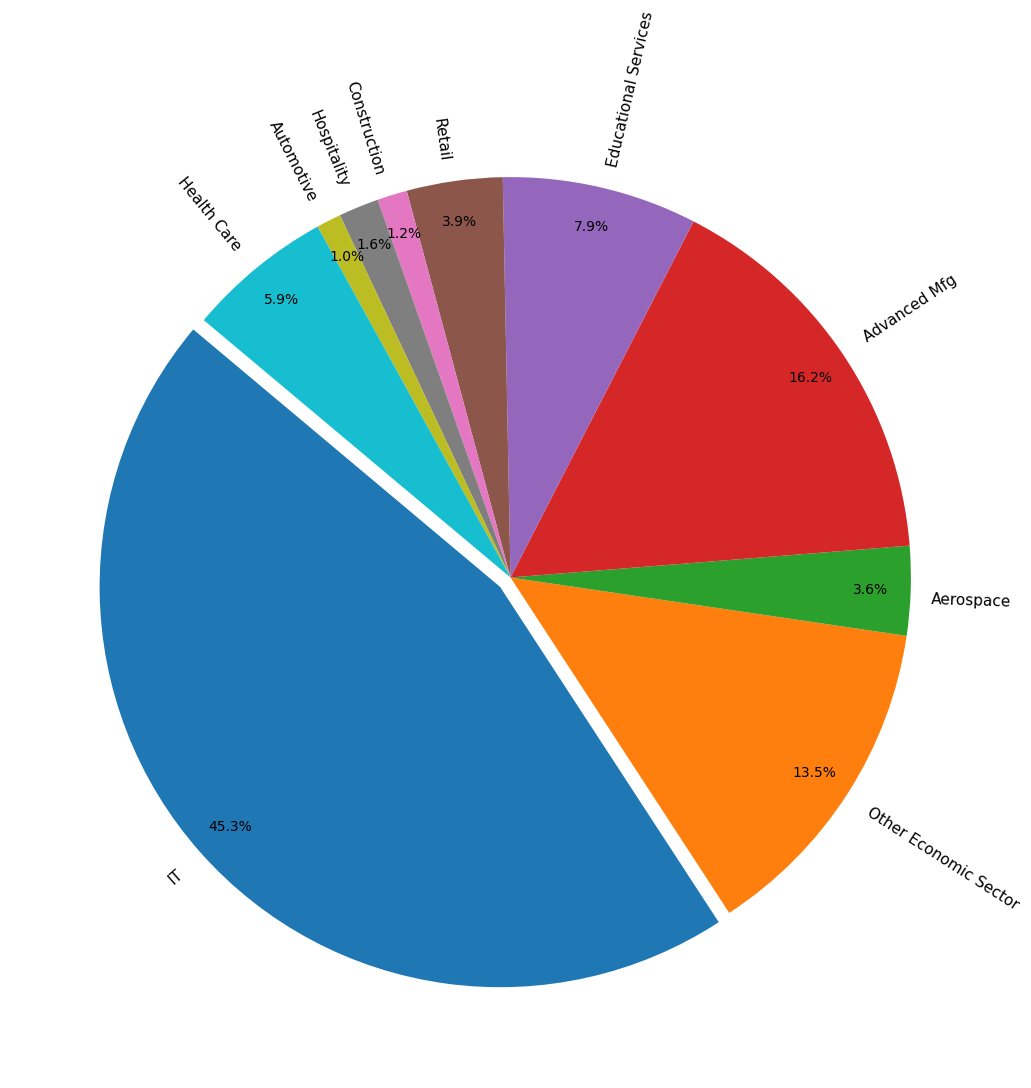

In [ ]:
#Creating lists for us economic sectors and their counts
usecolabels = []
usecovalues = []
explode = (0.035, 0, 0, 0,0,0,0,0,0,0)

for key, value in us_economic_counts.items():
    usecolabels.append(key)
    usecovalues.append(value)

#Setting plot parameters
plt.figure(figsize=(13,13))
sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
plt.pie(usecovalues[:10], labels=usecolabels[:10], explode = explode, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05)

Even our US economic sector sample contained only 120 868 non-missing values, this somehow confirms that IT and Advanced Manufacturing are the most convenient sectors for applying foreigners. As a next step in our EDA, let's take a look at the most desired job titles, citizenships and class of admission of our Visa applicants.  

In [ ]:
df['job_info_job_title'].value_counts()[:20]

,count
job_info_job_title,
Software Engineer,14372
Computer Systems Analyst - V,4747
Senior Software Engineer,3801
Computer Systems Analyst - II,3416
Software Developer,2880
Assistant Professor,2604
Programmer Analyst,2534
Computer Systems Analyst - IV,2496
Systems Analyst,2034


Since our column contains job titles with different letter casing we need to standarize them so that
value_counts() method will be able to count them more appropriately. Also, there are lots of same positions
like "Computer Systems Analyst" which differ only by the number standing after hyphen so we will
split these titles by finding the '-', 'ii' and '/' signs and leaving only the left side of the splitting
result. Afterwards, we are going to remove leading and ending spaces, replace "sr." with "senior" values and get rid of  'nan's.

In [ ]:
#Converting values to lower case
df['job_info_job_title'] = df['job_info_job_title'].str.lower()

#Splitting job titles by '-'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('-').str[0]
#Splitting job titles by 'ii'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('ii').str[0]
#Splitting job titles by '/'
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.split('/').str[0]
#Removing leading and ending spaces
df['job_info_job_title'] = df['job_info_job_title'].astype(str).str.strip()
#Replacing "sr." values with "senior"
df['job_info_job_title'] = df['job_info_job_title'].str.replace('sr.', 'senior')
#Replacing "NaN", "NaT" and "nan" values with np.nan
df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


df['job_info_job_title'].value_counts(dropna=True)[:10]

<ipython-input-20-a1af5c613668>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)


,count
job_info_job_title,
software engineer,18582
computer systems analyst,12054
senior software engineer,5802
software developer,4501
programmer analyst,3763
assistant professor,2869
software development engineer,2766
systems analyst,2587
senior programmer analyst,1884


<ipython-input-21-ece0cd8d6d4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_info_job_title',data=df,


[Text(0.5, 0, 'Job Title'), Text(0, 0.5, 'Number of Visa applications')]

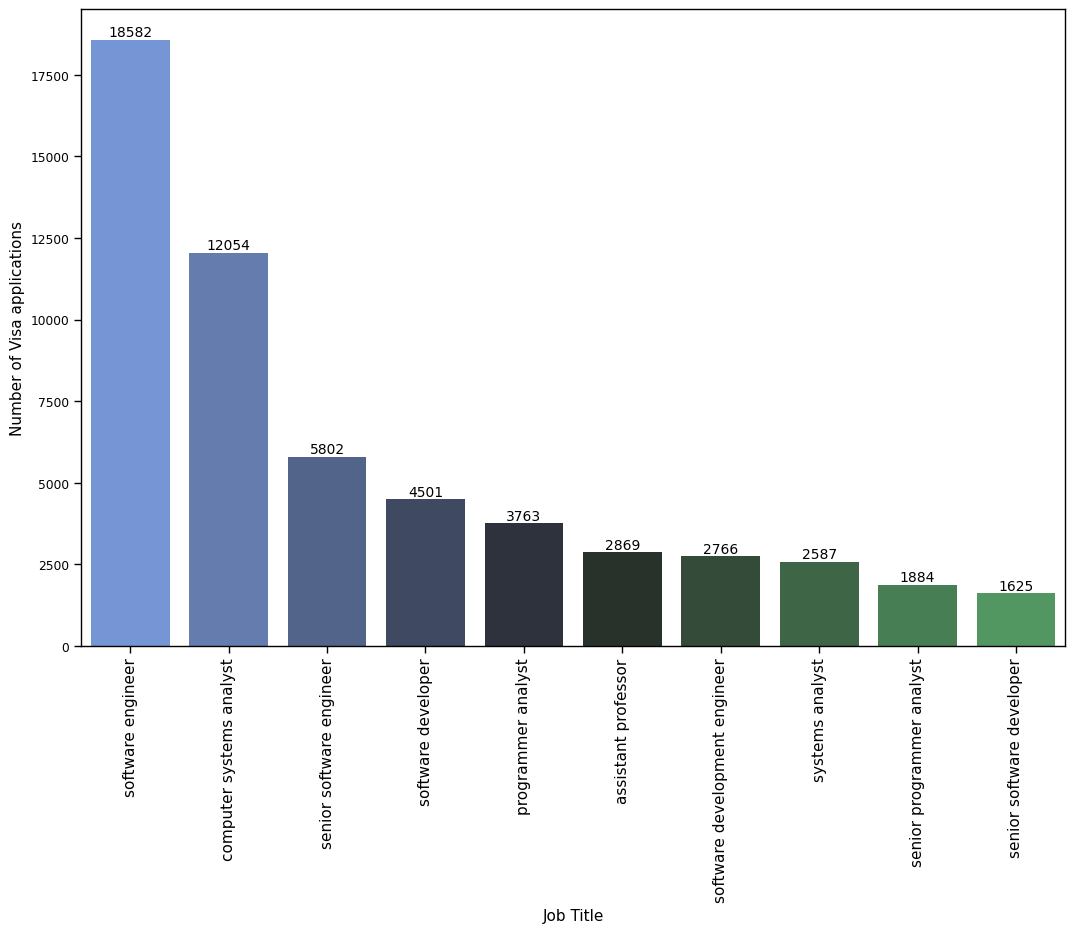

In [ ]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='job_info_job_title',data=df,
               palette = sns.diverging_palette(255, 133, l=60, n=10, center="dark"),
               order=df.job_info_job_title.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Get value counts
value_counts = df.job_info_job_title.value_counts().iloc[:10]

#Iterating over elements in "job_info_job_title" column and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
        ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

#Setting label titles
ax.set(xlabel='Job Title', ylabel='Number of Visa applications')

Interestingely, all of the most popular positions except  "assistant professor" are derived from the IT industry. This is another confirmation that there is a huge demand for IT specialists in USA and being one of them increases our chances to obtain a permanent Visa.

<ipython-input-22-ef3a8a90e57e>:5: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x='country_of_citizenship',hue='case_status',data=df,


[Text(0.5, 0, 'Country of citizenship'),
 Text(0, 0.5, 'Number of Visa applications')]

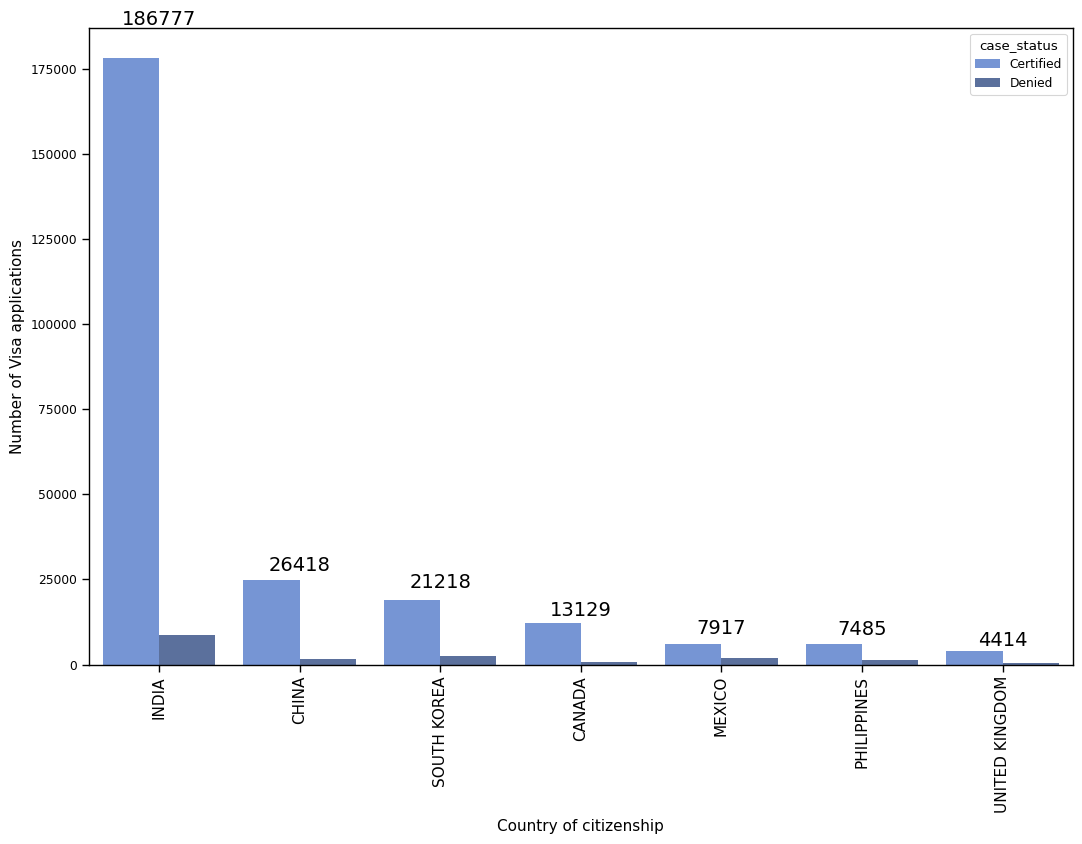

In [ ]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='country_of_citizenship',hue='case_status',data=df,
              palette = sns.diverging_palette(255, 133, l=60, n=7, center="dark"),
              order=df.country_of_citizenship.value_counts().iloc[:7].index)
plt.xticks(rotation=90)

# Get value counts
value_counts = df.country_of_citizenship.value_counts().iloc[:7]

#Iterating over elements in "country_of_citizenship" column and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
        ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

#Setting label titles
ax.set(xlabel='Country of citizenship', ylabel='Number of Visa applications')

As we can see, the majority of Visa applications has been submitted by Indian citizens. They constitute to more than half of our observations, we can assume that most of them are computer specialists.

[Text(0.5, 0, 'Visa type'), Text(0, 0.5, 'Number of Visa applications')]

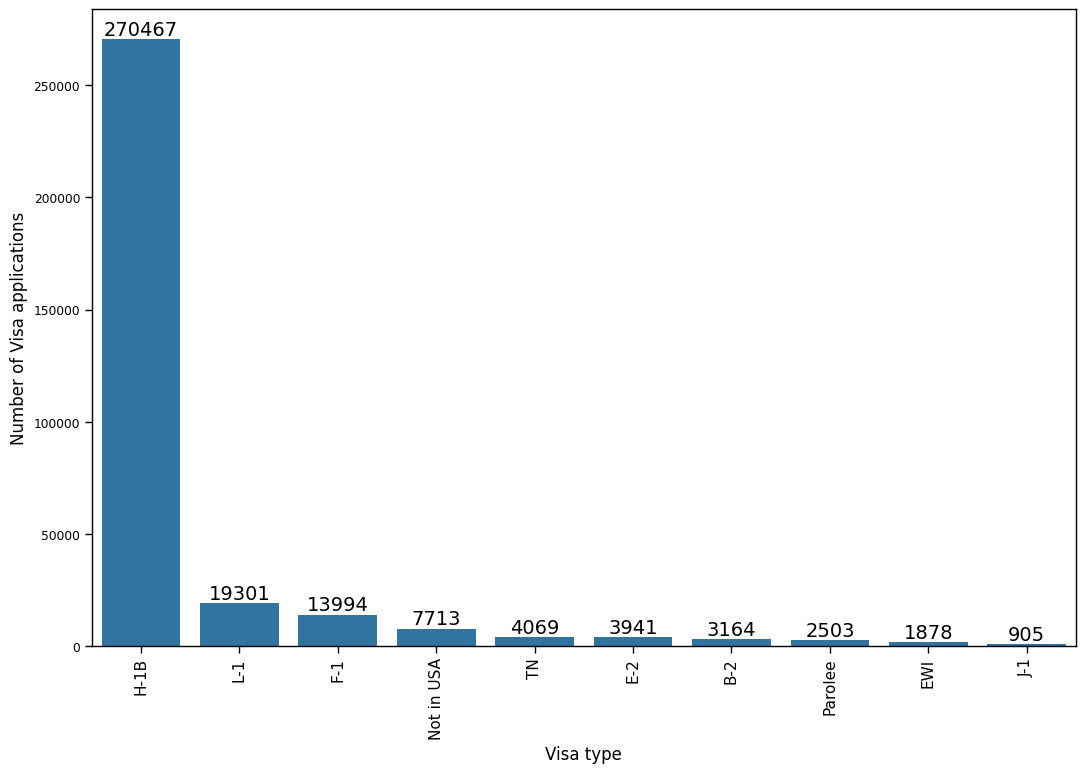

In [ ]:
# Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)

# Create countplot
sns.countplot(x='class_of_admission', data=df,
              order=df.class_of_admission.value_counts().iloc[:10].index)
plt.xticks(rotation=90)

# Get value counts
value_counts = df.class_of_admission.value_counts().iloc[:10]

# Iterating over elements and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
    ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

ax.set(xlabel='Visa type', ylabel='Number of Visa applications')

The vast majority of petitioners were applying for the H-1B Visa, which according to the Wikipedia, allows U.S. employers to employ foreign workers in specialty occupations. If a foreign worker in H-1B status quits or is dismissed from the sponsoring employer, the worker must either apply for and be granted a change of status, find another employer (subject to application for adjustment of status and/or change of visa), or leave the United States.


Finally, let's try checking on the number and kind of application types. Unfortunately, our data consists only of 126 848 non-missing values for this attribute, but this should give us a general overview.

<ipython-input-24-4d8560d6a185>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='application_type', data=df, palette = sns.color_palette("GnBu_d"), order=df.application_type.value_counts().iloc[:10].index)
<ipython-input-24-4d8560d6a185>:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(x='application_type', data=df, palette = sns.color_palette("GnBu_d"), order=df.application_type.value_counts().iloc[:10].index)


[Text(0.5, 0, 'Application type'), Text(0, 0.5, 'Number of Visa applications')]

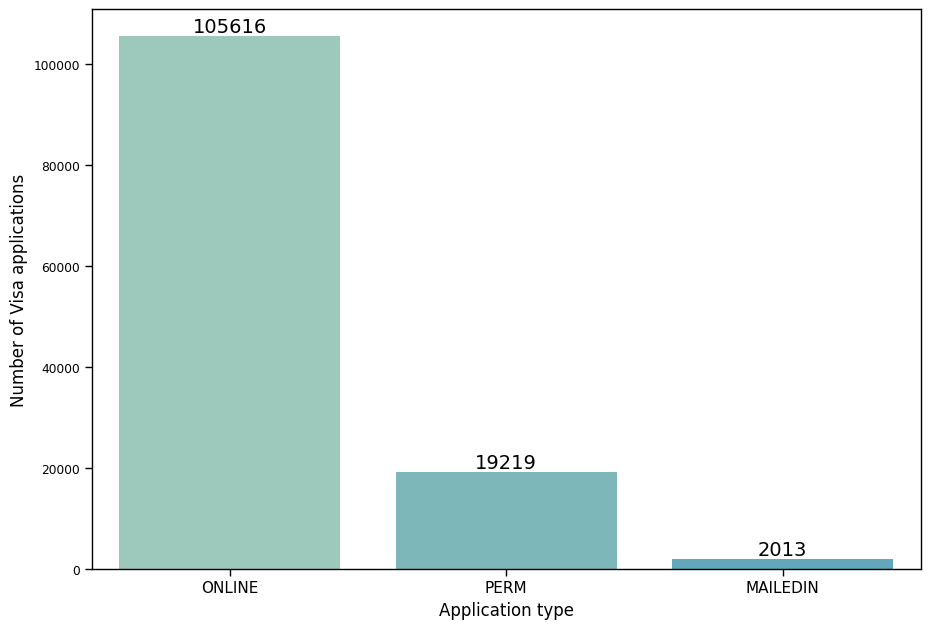

In [ ]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 7.27)
sns.countplot(x='application_type', data=df, palette = sns.color_palette("GnBu_d"), order=df.application_type.value_counts().iloc[:10].index)

# Get value counts
value_counts = df.application_type.value_counts().iloc[:10]

# Iterating over elements and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
        ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

ax.set(xlabel='Application type', ylabel='Number of Visa applications')

Online submission was the most popular form of application type. Here, we can also find "PERM" value which is probably incorrect. My assumtion is that some petitioners thought about this form field as a distinction between "temporary" and "permanent" Visa type. The last plotting activity will be displaying the applicants education level and remuneration.

<ipython-input-25-e2959700ea1a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='foreign_worker_info_education',data=df,
<ipython-input-25-e2959700ea1a>:5: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.countplot(x='foreign_worker_info_education',data=df,


[Text(0.5, 0, 'Education level'), Text(0, 0.5, 'Number of Visa applications')]

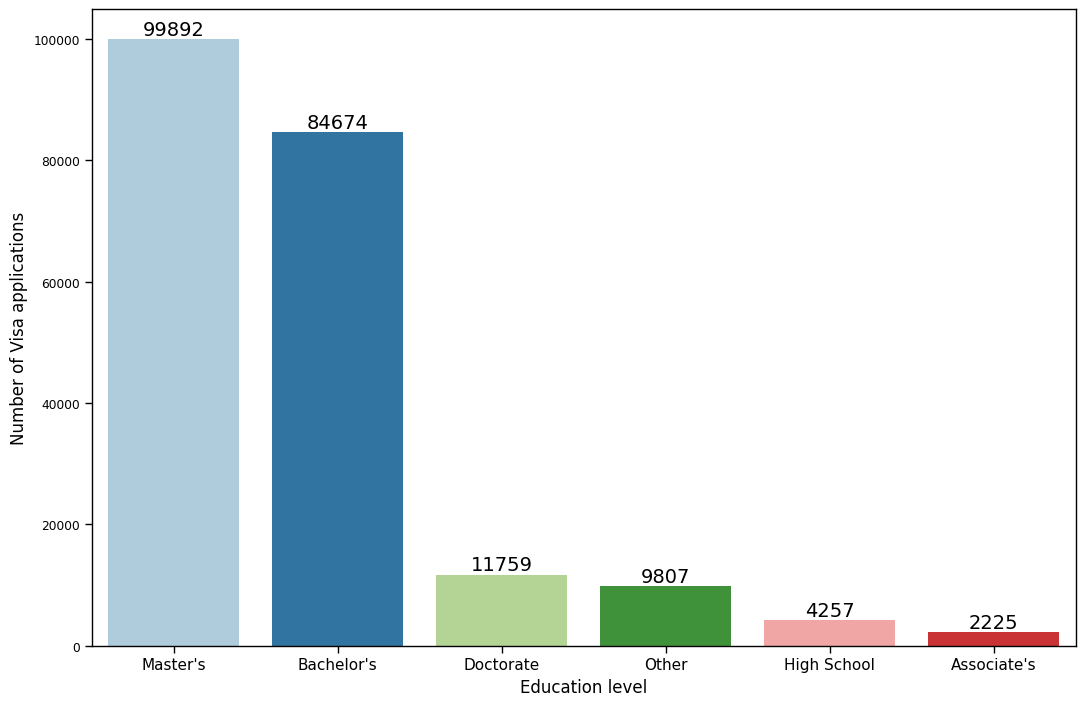

In [ ]:
#Setting plot parameters
fig, ax = plt.subplots()
fig.set_size_inches(12.7, 8.27)
 #sns.set_context(rc={"font.size":14, "axes.labelsize":12})
sns.countplot(x='foreign_worker_info_education',data=df,
               palette = sns.color_palette("Paired"),
               order=df.foreign_worker_info_education.value_counts().iloc[:10].index)

# Get value counts
value_counts = df.foreign_worker_info_education.value_counts().iloc[:10]

# Iterating over elements and displaying counts above bars
for i, (category, count) in enumerate(value_counts.items()):
        ax.text(i, count, str(count),
            horizontalalignment='center',
            verticalalignment='bottom')

#Setting label titles
ax.set(xlabel='Education level', ylabel='Number of Visa applications')


As we can see, over 50% of applicants obtained a university degree. Before plotting the remuneration, we will remove commas from the values so that they are left only with decimal places denoted. Also, since some of the wages are hourly, weekly, bi-weekly and monthly values, we have to calculate the yearly equivalents for them. According to the https://www.timeanddate.com/date/workdays.html website, the average number of working days in USA is 250. We will use this information in our calculations.

In [ ]:
df[['pw_amount_9089','pw_unit_of_pay_9089']].head(10)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
5,37024.0,yr
6,47083.33,yr
7,36733.0,yr
8,44824.0,yr
9,12.86,hr


In [ ]:
# First clean the data
df['pw_amount_9089'] = df['pw_amount_9089'].str.replace(",", "").str.strip()

# Function to safely convert to float
def safe_float_convert(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return None

# Process the different pay units
for unit in df.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'].apply(safe_float_convert) * 8 * 250
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = "Year"
    elif unit == "wk" or unit == "Week":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'].apply(safe_float_convert) * 50
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = "Year"
    elif unit == "mth" or unit == "Month":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'].apply(safe_float_convert) * 12
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = "Year"
    elif unit == "bi" or unit == "Bi-Weekly":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'].apply(safe_float_convert) * 25
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = "Year"
    elif unit == "yr":
        df.loc[df['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = "Year"

# Fill missing values with median after converting all to float
df['pw_amount_9089'] = pd.to_numeric(df['pw_amount_9089'], errors='coerce')
df['pw_amount_9089'] = df['pw_amount_9089'].fillna(df['pw_amount_9089'].median())

# Display results
print(df[['pw_amount_9089', 'pw_unit_of_pay_9089']].head(10))

   pw_amount_9089 pw_unit_of_pay_9089
0        75629.00                Year
1        37024.00                Year
2        47923.00                Year
3        21940.00                Year
4        94890.00                Year
5        37024.00                Year
6        47083.33                Year
7        36733.00                Year
8        44824.00                Year
9        25720.00                Year


In [ ]:
#Since running "describe" method on "pw_amount_9089" column returned exponential values, I decided to
#convert them to floats so that they are easier to understand
with pd.option_context('float_format', '{:.2f}'.format): print(df.pw_amount_9089.describe())

count      356168.00
mean       469624.51
std       7679620.28
min             7.50
25%         67808.00
50%         86278.00
75%        104790.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [ ]:
#Dividing our continuous income values into some categories to facilitate their visualization
df['remuneration'] = pd.cut(df['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = df['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

,count
remuneration,
0-30k,19810
30-60k,47493
60-90k,133050
90-120k,112631
120-150k,30532
150-180k,7094
180-210k,3801
210-240k,604
240-270k,29


<ipython-input-30-13595fe894a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='remuneration', data=df, kind="count",


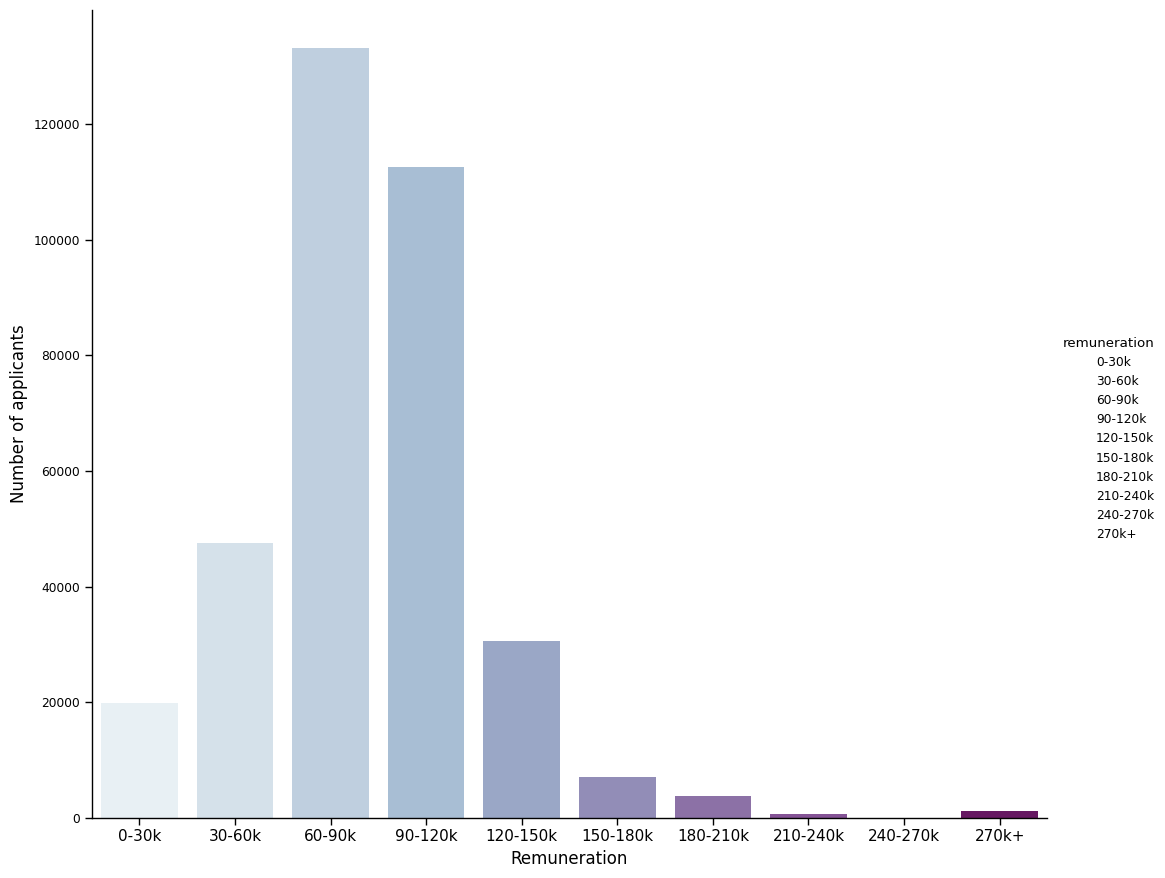

In [ ]:
# Draw a count plot to show the distribution of remunerations
# Using catplot instead of factorplot
g = sns.catplot(x='remuneration', data=df, kind="count",
                palette="BuPu", height=9, aspect=1.2)
g.set(xlabel='Remuneration', ylabel='Number of applicants')

As we can see, over 65% of the applicants earn between 60 and 120 thousand dollars yearly.  From this moment, we will start working on the feature selection and data cleansing.

## Feature selection and data cleansing

In [ ]:
#Displaying percentage of non-null values for each feature
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1,"Column: '{}'".format(col),"contains ", np.round(100*df[col].count()/len(df['case_status']),decimals=2),"% non-null values" )

0 Column: 'add_these_pw_job_title_9089' contains  10.99 % non-null values
1 Column: 'agent_city' contains  56.92 % non-null values
2 Column: 'agent_firm_name' contains  55.74 % non-null values
3 Column: 'agent_state' contains  56.05 % non-null values
4 Column: 'application_type' contains  35.61 % non-null values
5 Column: 'case_received_date' contains  64.39 % non-null values
6 Column: 'case_status' contains  100.0 % non-null values
7 Column: 'class_of_admission' contains  94.08 % non-null values
8 Column: 'country_of_citizenship' contains  94.59 % non-null values
9 Column: 'country_of_citzenship' contains  5.4 % non-null values
10 Column: 'decision_date' contains  100.0 % non-null values
11 Column: 'employer_address_1' contains  99.99 % non-null values
12 Column: 'employer_address_2' contains  33.7 % non-null values
13 Column: 'employer_city' contains  100.0 % non-null values
14 Column: 'employer_country' contains  64.37 % non-null values
15 Column: 'employer_decl_info_title' contains

In [ ]:
#Leaving columns which have more than 330000 non-missing observations
df = df.loc[:,df.count() >= 330000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   case_status             356168 non-null  object        
 1   class_of_admission      335083 non-null  object        
 2   country_of_citizenship  336896 non-null  object        
 3   decision_date           356168 non-null  datetime64[ns]
 4   employer_address_1      356131 non-null  object        
 5   employer_city           356158 non-null  object        
 6   employer_name           356160 non-null  object        
 7   employer_postal_code    356135 non-null  object        
 8   employer_state          356131 non-null  object        
 9   job_info_work_city      356073 non-null  object        
 10  job_info_work_state     356072 non-null  object        
 11  pw_amount_9089          356168 non-null  float64       
 12  pw_soc_code             355594 non-

Since our dataset consists of 19 attributes which have less than 12% of missing values , we will choose some of them for further analysis and perform imputations.

In [ ]:
#Indices of selected features
chosen_attrs = [0,1,2,5,6,8,12,14,17,18]
df = df.iloc[:,chosen_attrs]

In [ ]:
#Assigning Labels to Case Status
df.loc[df.case_status == 'Certified', 'case_status'] = 1
df.loc[df.case_status == 'Denied', 'case_status'] = 0

#Filling missing values in "employer_state" column with mode
df['employer_state'] = df['employer_state'].fillna(df['employer_state'].mode()[0]);

#Mapping from state name to abbreviation
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP',
    'Palau': 'PW',
    'Puerto Rico': 'PR',
    'Virgin Islands': 'VI',
    'District of Columbia': 'DC'
}

#Capitalizing Keys
us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
df['employer_state'].replace(us_state_abbrev, inplace=True)
df.employer_state = df.employer_state.astype(str)

<ipython-input-34-73bea901421a>:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employer_state'].replace(us_state_abbrev, inplace=True)


In [ ]:
df['pw_soc_code'] = df['pw_soc_code'].str.replace('.','')
df['pw_soc_code'] = df['pw_soc_code'].str.replace('-','')
df['pw_soc_code'] = df['pw_soc_code'].astype(str).str[0:6]
df['pw_soc_code'].value_counts()

#Finding "nan" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "nan",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Finding "None" values in "pw_soc_code" column and filling them with mode
df.loc[df['pw_soc_code'] == "None",'pw_soc_code'] = df['pw_soc_code'].mode()[0]

#Changing type from string to int
df['pw_soc_code'] = df['pw_soc_code'].astype(int)
df['case_status'] = df['case_status'].astype(int)

In [ ]:
#Replacing missing values with mode
df['class_of_admission']=df['class_of_admission'].fillna((df['class_of_admission'].mode()[0]))
df['country_of_citizenship']=df['country_of_citizenship'].fillna((df['country_of_citizenship'].mode()[0]))
df['employer_city']=df['employer_city'].fillna((df['employer_city'].mode()[0]))
df['employer_name']=df['employer_name'].fillna((df['employer_name'].mode()[0]))
df['employer_name']=df['employer_name'].astype(str).str.upper()
df['pw_source_name_9089']=df['pw_source_name_9089'].fillna((df['pw_source_name_9089'].mode()[0]))
df['remuneration']=df['remuneration'].fillna((df['remuneration'].mode()[0]))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   case_status             356168 non-null  int64   
 1   class_of_admission      356168 non-null  object  
 2   country_of_citizenship  356168 non-null  object  
 3   employer_city           356168 non-null  object  
 4   employer_name           356168 non-null  object  
 5   employer_state          356168 non-null  object  
 6   pw_soc_code             356168 non-null  int64   
 7   pw_source_name_9089     356168 non-null  object  
 8   year                    356168 non-null  int32   
 9   remuneration            356168 non-null  category
dtypes: category(1), int32(1), int64(2), object(6)
memory usage: 26.2+ MB


## Data type conversion

In this step we're going to turn our feature variables into categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = {}

#Creating categories denoted by integers from column values
for col in df.columns:
    cat_var_name = "cat_"+ col
    cat_var_name = LabelEncoder()
    cat_var_name.fit(df[col])
    df[col] = cat_var_name.transform(df[col])
    categorical_variables[col] = cat_var_name

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356168 entries, 0 to 374353
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   case_status             356168 non-null  int64
 1   class_of_admission      356168 non-null  int64
 2   country_of_citizenship  356168 non-null  int64
 3   employer_city           356168 non-null  int64
 4   employer_name           356168 non-null  int64
 5   employer_state          356168 non-null  int64
 6   pw_soc_code             356168 non-null  int64
 7   pw_source_name_9089     356168 non-null  int64
 8   year                    356168 non-null  int64
 9   remuneration            356168 non-null  int64
dtypes: int64(10)
memory usage: 29.9 MB


# Applying Machine Learning algorithms

First thing we're going to do in this part of our analysis will be dividing our final dataset into 2 dataframes. First one will consist of feature variables and the second one only of our target variable - case_status. Afterward we will
use GridSearch object with cross-validation to find the best parameters for Logistic Regression, k-Nearest Neighbor, Random Forest and Gradient Boosting Classifiers and evaluate how well they will generalize. Cross validation will split the data repeatedly using Stratified K-Folds cross-validator and train multiple models.

In [ ]:
#Dividing our final dataset into features(explanatory variables) and labels(target variable)
#!!!!
#Take initial

#df.add_column["fraud"]
#df.set all the rows in original data frame to 0 for honest applications
#GAN logic generated rows for data frame
#GAN_df add_column(fraud )
#set all the rows in GAN df to 1
#x=df.loc[:, df.columns != "fraud"]
#y=df.loc[] fraud
#loss function, plot
#350,000 evenly split data between honest and lie
#360,000 rows,
X = df.loc[:, df.columns != 'case_status']
y = df.case_status

print("The shape of X is: {}".format(X.shape))
print("The shape of y is: {}".format(y.shape))

The shape of X is: (356168, 9)
The shape of y is: (356168,)


## Logistic Regression

In [ ]:
#Importing Logistic Regression Classifier, GridSearchCV, train_test_split and accuracy metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#Defining fit_algorithm function
def fit_algorithm(alg, X, y, parameters, cv = 5):
    """
    This function will split our dataset into training and testing subsets, fit cross-validated
    GridSearch object, test it on the holdout set and return some statistics
    """
    #instead of certified or denied, train on fraudulent/not fraudulent
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    grid = GridSearchCV(alg, parameters, cv = cv)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    confmat = confusion_matrix(y_test,y_pred)

    return pd.Series({
        "Train_ACC": np.around(grid.best_score_, decimals=2).astype(str),
        "Test_ACC": np.around(grid.score(X_test, y_test), decimals=2).astype(str),
        "P": np.around(precision_score(y_pred, y_test), decimals=2).astype(str),
        "R": np.around(recall_score(y_pred, y_test),decimals=2).astype(str),
        "F1": np.around(f1_score(y_pred, y_test),decimals=2).astype(str),
        "Best_params": [grid.best_params_],
        "True negatives": confmat[0,0],
        "False negatives": confmat[1,0],
        "True positives": confmat[1,1],
        "False positives": confmat[0,1]
        })

In [ ]:
#To perform hyper parameter optimisation a list of multiple elements will be entered and the optimal
#value in that list will be picked using Grid Search object
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }

logreg = fit_algorithm(LogisticRegression(),X,y,logreg_params)
logreg

Best_params        [{'C': 1}]
F1                       0.96
False negatives            36
False positives          6357
P                         1.0
R                        0.93
Test_ACC                 0.93
Train_ACC                0.93
True negatives             30
True positives          82619
dtype: object

As we can see, the Logistic Regression Classifier results in 93% accuracy on both training and testing datasets which is quite a good score. This result was achieved using default "liblinear" solver algorithm and L2 regularization with C parameter = 1.  Now, let's assess the effectiveness of k-Nearest Neighbors algorithm.

## k-Nearest Neighbors

In [ ]:
#Importing k-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#Defining range of parameters for kNN Clssifier
knn_params = {'n_neighbors': np.arange(1,11).tolist()}

#Using "fit_algorithm" function with kNN Classifier
knn = fit_algorithm(KNeighborsClassifier(),X,y,knn_params)
knn

,0
Train_ACC,0.93
Test_ACC,0.93
P,0.99
R,0.94
F1,0.96
Best_params,[{'n_neighbors': 9}]
True negatives,927
False negatives,590
True positives,82065
False positives,5460


Interestingly, the k-Nearest Neighbors Classifier achieved the same accuracy score as the Logistic Regression Classifier. Even accuracy is the same, there are slight differences in Precision, Recall, True Positive, True Negative, False Positive and False Negative values. Now, let's check, how precise the Random Forest Classifier can be.

## Random Forests

In [ ]:
#Defining range of parameters for Random Forest Classifier
forest_params = {'n_estimators': [10,20,30,40,50],
     'max_depth': [15,20,25,30],
     'max_features': [2,3,4],
     'random_state': [123],
     'n_jobs': [-1]
    }

# #Importing RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

forest = fit_algorithm(RandomForestClassifier(),X,y, forest_params)
forest

Best_params        [{'max_depth': 20, 'max_features': 4, 'n_estim...
F1                                                              0.97
False negatives                                                  513
False positives                                                 4954
P                                                               0.99
R                                                               0.94
Test_ACC                                                        0.94
Train_ACC                                                       0.94
True negatives                                                  1433
True positives                                                 82142
dtype: object

As we can see, the Random Forest Classifier achieved the accuracy of 94% which is 1% better than Logistic Regression and k-Nearest Neighbors Classifiers. The distribution of True Positives, True Negatives, False Positives and False Negatives is also different. We could try to build more precise model by adjusting the hyperparameters, but we should bear in mind that this is very computationally expensive. In my case, I tried supplying the above Random Forest Classifier with more hyperparameter values, but the Kernel has been killed multiple times so I had to narrow down their number. As the last ML algorithm, we will try Gradient Boosted Machines which are another ensemble method implemented in scikit-learn. The main idea behind this algorithm is to combine multiple decision trees which in contrast to these used in Random Forest classifier are working in a serial manner, where each tree tries to correct the mistakes of the previous one.  

## Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [ ]:
#Importing GradientBoostingClassifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

#Defining range of parameters for Gradient Boosting Clssifier
gradient_params = {'n_estimators': [100],
     'max_depth': [3],
     'random_state': [123],
     'learning_rate': [0.1]
    }

gradient = fit_algorithm(GradientBoostingClassifier(),X,y,gradient_params)
gradient

,0
Train_ACC,0.93
Test_ACC,0.93
P,1.0
R,0.93
F1,0.96
Best_params,"[{'learning_rate': 0.1, 'max_depth': 3, 'n_est..."
True negatives,381
False negatives,233
True positives,82422
False positives,6006


As previously, we achieved similar accuracy of 93% on both training and testing datasets, but this result could be higher, if we tried different values of hyperparameters. The main idea behind gradient boosting is to combine many simple models(trees) where each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance. Gradient Boosted Trees are frequently winning entries in machine learning competitions. Except from the number of trees in the ensemble, another important parameter for this algorithm is "learning_rate" which controls how strongly each tree tries to correct the mistakes of the previous trees. Since Random Forests and Gradient Boosted Machines are very computationally expensive and Kaggle kills kernels running longer than 1 hour, I strongly encourage you to test all of  the abovely shown algorithms on your locally set Jupyter Notebooks with broader range of hyperparameter values- it's very likely that they will be able to achieve better accuracy.

Finally, since the Random Forest Classifier achieved best accuracy on both training and testing datasets I'll built a model using parameter values chosen by Grid Search object and display feature importances so that we will find out which feature is the most important one in obtatining a US Permanent Visa.

In [ ]:
# Dataframe made of results
summary = pd.concat([logreg,knn,forest,gradient],axis=1)
summary.columns = ['Logistic Regression', 'k-Nearest Neighbors','Random Forest','GBoosted Machines']
summary

,Logistic Regression,k-Nearest Neighbors,Random Forest,GBoosted Machines
Best_params,[{'C': 1}],[{'n_neighbors': 9}],"[{'max_depth': 20, 'max_features': 4, 'n_estim...","[{'learning_rate': 0.1, 'max_depth': 3, 'n_est..."
F1,0.96,0.96,0.97,0.96
False negatives,36,589,513,258
False positives,6357,5487,4954,5990
P,1.0,0.99,0.99,1.0
R,0.93,0.94,0.94,0.93
Test_ACC,0.93,0.93,0.94,0.93
Train_ACC,0.93,0.93,0.94,0.93
True negatives,30,900,1433,397
True positives,82619,82066,82142,82397


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()

        # Layer architecture
        self.gen = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, output_dim),
            nn.Tanh()  # Output between -1 and 1
        )

    def forward(self, x):
        return self.gen(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()

        self.disc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability between 0 and 1
        )

    def forward(self, x):
        return self.disc(x)





In [ ]:
class H1BGAN:
    def __init__(self, real_data):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # First preprocess the data
        self.original_data = real_data.copy()
        self.original_columns = real_data.columns
        self.real_data, self.encoders = self._preprocess_data(real_data)

        # Set dimensions
        self.input_dim = 100
        self.output_dim = self.real_data.shape[1]

        # Initialize networks
        self.generator = Generator(self.input_dim, self.output_dim).to(self.device)
        self.discriminator = Discriminator(self.output_dim).to(self.device)

        # Initialize optimizers
        self.g_optimizer = optim.Adam(self.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        self.d_optimizer = optim.Adam(self.discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

        # Loss function
        self.criterion = nn.BCELoss()
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # Store original data and column names
        self.original_data = real_data.copy()
        self.original_columns = real_data.columns

        # Preprocess the data
        self.real_data, self.encoders = self._preprocess_data(real_data)

        self.input_dim = 100  # Noise dimension
        self.output_dim = self.real_data.shape[1]  # Updated dimension after preprocessing

    def _preprocess_data(self, data):
        """Preprocess the data by encoding categorical variables and scaling numerical ones"""
        from sklearn.preprocessing import LabelEncoder, MinMaxScaler
        import pandas as pd

        processed_data = data.copy()
        encoders = {}

        # Convert dates to timestamps
        date_columns = [col for col in processed_data.columns if 'date' in col.lower()]
        for col in date_columns:
            try:
                processed_data[col] = pd.to_datetime(processed_data[col]).astype(np.int64) // 10**9
            except:
                # If conversion fails, drop the column
                processed_data = processed_data.drop(col, axis=1)

        # Identify categorical columns (object dtype)
        categorical_columns = processed_data.select_dtypes(include=['object']).columns

        # Encode categorical variables
        for col in categorical_columns:
            encoders[col] = LabelEncoder()
            processed_data[col] = encoders[col].fit_transform(processed_data[col].astype(str))

        # Scale all columns to [0, 1] range
        scaler = MinMaxScaler()
        processed_data = pd.DataFrame(
            scaler.fit_transform(processed_data),
            columns=processed_data.columns
        )
        encoders['scaler'] = scaler

        return processed_data, encoders

        # Initialize networks
        self.generator = Generator(self.input_dim, self.output_dim).to(self.device)
        self.discriminator = Discriminator(self.output_dim).to(self.device)

        # Optimizers
        self.g_optimizer = optim.Adam(self.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        self.d_optimizer = optim.Adam(self.discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

        # Loss function
        self.criterion = nn.BCELoss()

    def generate_fraudulent_patterns(self):
        """Generate specific fraudulent patterns based on actual columns"""
        patterns = {
            'wage_mismatch': {
                'wage_offer_from_9089': 150000,  # Suspiciously high wage
                'job_info_experience_num_months': 12,  # Entry level experience
                'job_info_education': 'Bachelor\'s'
            },
            'experience_education_mismatch': {
                'job_info_education': 'High School',
                'job_info_job_title': 'Senior Software Engineer',
                'job_info_experience_num_months': 6  # Too little experience
            },
            'application_timeline_mismatch': {
                'case_received_date': 'recent',
                'decision_date': 'very_quick'  # Suspicious quick approval
            }
        }
        return patterns

    def inject_fraud_patterns(self, generated_data):
        """Inject fraudulent patterns into generated data"""
        fraud_patterns = self.generate_fraudulent_patterns()

        # Randomly select records to inject fraud patterns
        fraud_indices = np.random.choice(
            len(generated_data),
            size=int(len(generated_data) * 0.15),  # 15% fraudulent applications
            replace=False
        )

        for idx in fraud_indices:
            pattern = np.random.choice(list(fraud_patterns.keys()))

            if pattern == 'wage_mismatch':
                if 'wage_offer_from_9089' in generated_data.columns:
                    # Double the wage for entry level positions
                    generated_data.loc[idx, 'wage_offer_from_9089'] = \
                        generated_data.loc[idx, 'wage_offer_from_9089'] * 2

                    if 'job_info_experience_num_months' in generated_data.columns:
                        generated_data.loc[idx, 'job_info_experience_num_months'] = 12

            elif pattern == 'experience_education_mismatch':
                if all(col in generated_data.columns for col in ['job_info_education',
                                                               'job_info_job_title',
                                                               'job_info_experience_num_months']):
                    generated_data.loc[idx, 'job_info_education'] = 'High School'
                    generated_data.loc[idx, 'job_info_job_title'] = 'Senior Software Engineer'
                    generated_data.loc[idx, 'job_info_experience_num_months'] = 6

            elif pattern == 'application_timeline_mismatch':
                if all(col in generated_data.columns for col in ['case_received_date',
                                                               'decision_date']):
                    # Create suspicious timeline patterns
                    received_date = pd.Timestamp.now() - pd.Timedelta(days=np.random.randint(1, 30))
                    decision_date = received_date + pd.Timedelta(days=np.random.randint(1, 5))

                    generated_data.loc[idx, 'case_received_date'] = received_date
                    generated_data.loc[idx, 'decision_date'] = decision_date

        return generated_data

    def train(self, epochs=100, batch_size=64):
        for epoch in range(epochs):
            for i in range(0, len(self.real_data), batch_size):
                # Get real batch
                real_batch = torch.FloatTensor(
                    self.real_data.iloc[i:i+batch_size].values
                ).to(self.device)
                batch_size = len(real_batch)

                # Generate fake data
                noise = torch.randn(batch_size, self.input_dim).to(self.device)
                fake_batch = self.generator(noise)

                # Train Discriminator
                self.d_optimizer.zero_grad()
                real_output = self.discriminator(real_batch)
                fake_output = self.discriminator(fake_batch.detach())

                d_loss_real = self.criterion(
                    real_output,
                    torch.ones_like(real_output)
                )
                d_loss_fake = self.criterion(
                    fake_output,
                    torch.zeros_like(fake_output)
                )
                d_loss = (d_loss_real + d_loss_fake) / 2
                d_loss.backward()
                self.d_optimizer.step()

                # Train Generator
                self.g_optimizer.zero_grad()
                fake_output = self.discriminator(fake_batch)
                g_loss = self.criterion(
                    fake_output,
                    torch.ones_like(fake_output)
                )
                g_loss.backward()
                self.g_optimizer.step()

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')

    def generate_applications(self, num_samples=1000, include_fraud=True):
        """Generate synthetic applications"""
        self.generator.eval()
        with torch.no_grad():
            noise = torch.randn(num_samples, self.input_dim).to(self.device)
            generated_data = self.generator(noise).cpu().numpy()

        # Convert to DataFrame with original column names
        df_generated = pd.DataFrame(
            generated_data,
            columns=self.real_data.columns
        )

        if include_fraud:
            df_generated = self.inject_fraud_patterns(df_generated)

        return df_generated

In [ ]:
# Example usage:
"""
# Prepare data
real_data = pd.DataFrame(...)  # Your real H1B application data

# Initialize and train GAN
gan = H1BGAN(real_data)
gan.train(epochs=200, batch_size=64)

# Generate synthetic applications with fraud patterns
synthetic_applications = gan.generate_applications(num_samples=1000, include_fraud=True)
"""
gan = H1BGAN(df)

In [ ]:
gan.train(epochs=2, batch_size=256)

In [ ]:
synthetic_applications = gan.generate_applications(num_samples=1000, include_fraud=True)

In [ ]:
df['is_fraud'] = False

In [ ]:
#traditional ML:
#need another passthrough the model
#fitting the model to the fraud/not fraud column - y values, save it to pickle
#using ollama to get an endpoint running
#langchain documentation to use that ollama to run llm assistant to provide suggestions on how we're prompting

